# A análise quantitativa de commodities envolve o uso de técnicas estatísticas, matemáticas e computacionais para estudar o comportamento dos preços, identificar padrões e desenvolver estratégias de trading. Abaixo, vou guiar você por um processo completo de análise quantitativa de commodities usando Python, incluindo coleta de dados, análise exploratória, modelagem e visualização.

1. Bibliotecas Necessárias
Primeiro, instale e importe as bibliotecas necessárias:

In [16]:
!pip install yfinance pandas numpy matplotlib seaborn scipy statsmodels

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

# 2. Coleta de Dados
Vamos usar o yfinance para baixar dados históricos de commodities. Aqui estão alguns exemplos de tickers de commodities:

Ouro: GC=F

Prata: SI=F

Petróleo Brent: BZ=F

Soja: ZS=F

Café: KC=F

Exemplo de coleta de dados para o ouro:

In [18]:
# Baixar dados históricos do ouro
gold_data = yf.download('GC=F', start='2010-01-01', end='2025-10-01')
print(gold_data.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54


# Repita o processo para outras commodities de interesse.

3. Análise Exploratória dos Dados (EDA)
# 3.1. Estatísticas Descritivas
Calcule estatísticas básicas, como média, desvio padrão, mínimo e máximo:

In [19]:
print(gold_data['Close'].describe())

Ticker         GC=F
count   3817.000000
mean    1560.330783
std      376.055783
min     1050.800049
25%     1262.199951
50%     1462.300049
75%     1793.000000
max     2947.899902


# 3.2. Visualização dos Preços
Plote a série temporal dos preços ajustados:

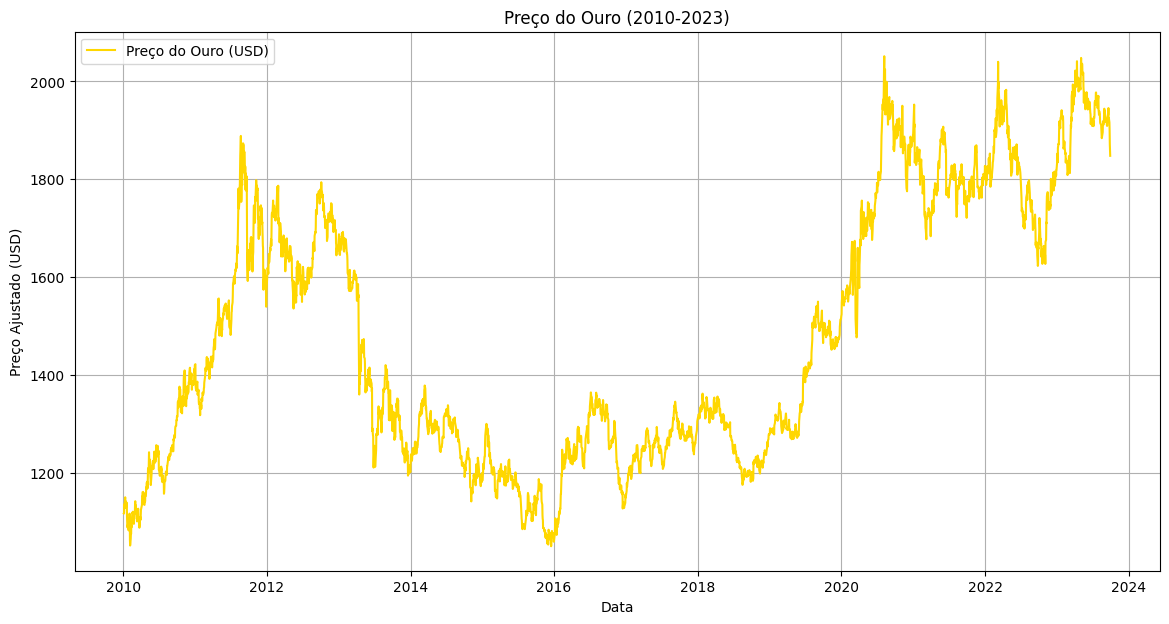

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Preço do Ouro (USD)', color='gold')
plt.title('Preço do Ouro (2010-2023)')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 3.3. Retornos Diários
Calcule e visualize os retornos diários:

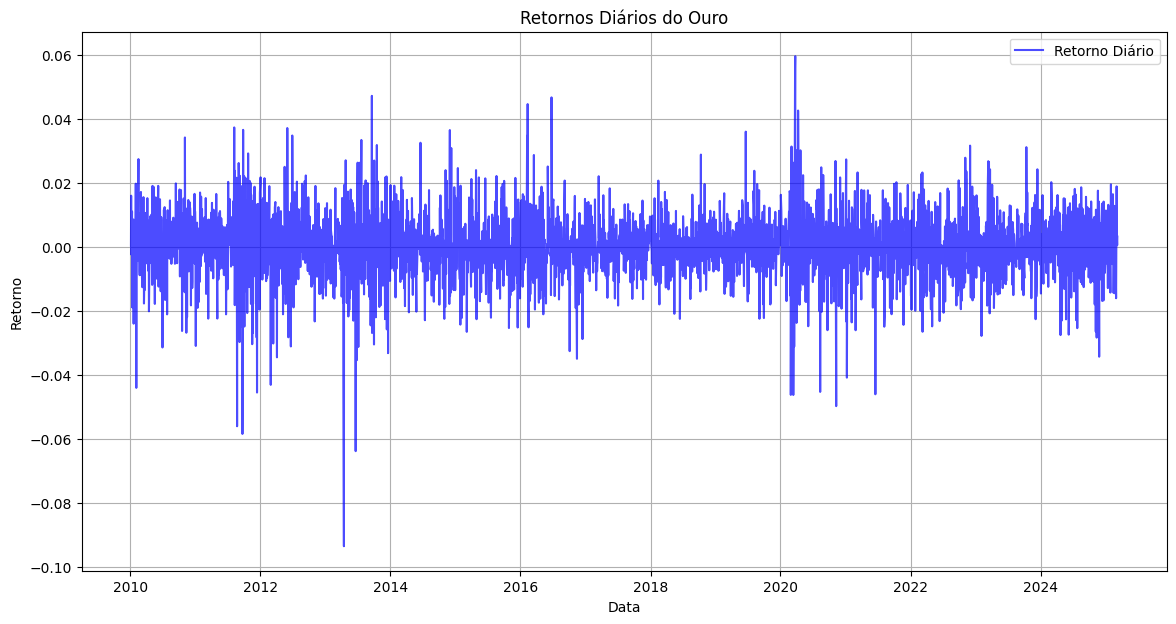

In [21]:
gold_data['Daily Return'] = gold_data['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(gold_data['Daily Return'], label='Retorno Diário', color='blue', alpha=0.7)
plt.title('Retornos Diários do Ouro')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()

# 3.4. Distribuição dos Retornos
Analise a distribuição dos retornos diários:

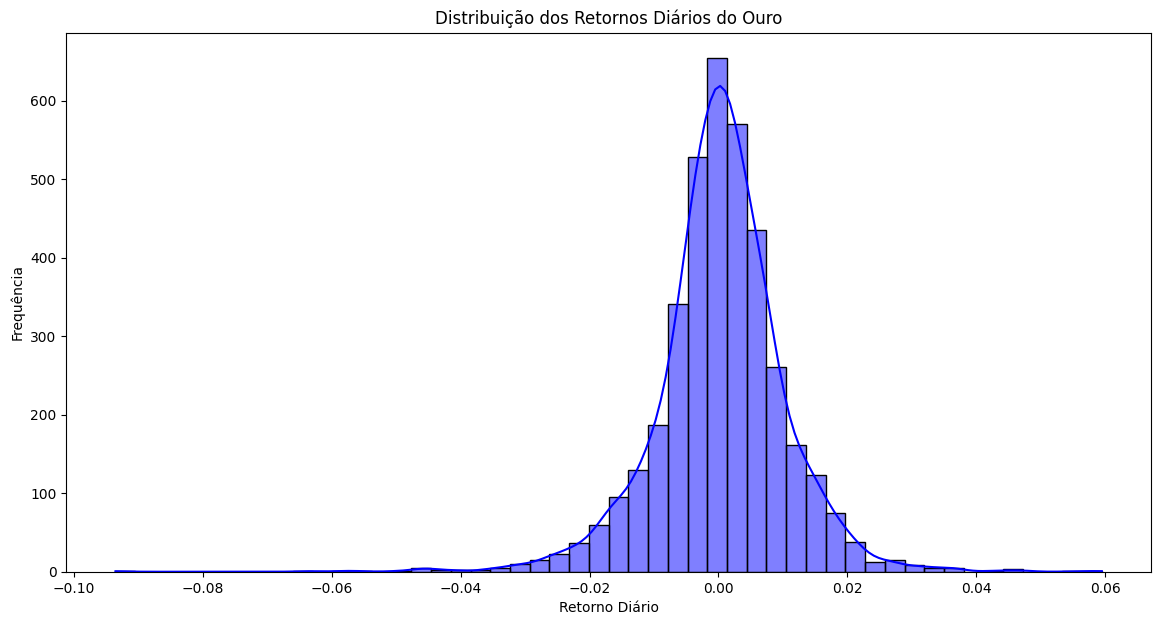

In [22]:
plt.figure(figsize=(14, 7))
sns.histplot(gold_data['Daily Return'].dropna(), bins=50, color='blue', kde=True)
plt.title('Distribuição dos Retornos Diários do Ouro')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

# 4. Análise Quantitativa
4.1. Volatilidade
Calcule a volatilidade (desvio padrão dos retornos):

In [23]:
volatility = gold_data['Daily Return'].std()
print(f'Volatilidade Anualizada: {volatility * np.sqrt(252):.2%}')

Volatilidade Anualizada: 15.93%


# 4.2. Médias Móveis
Calcule e visualize médias móveis para identificar tendências:

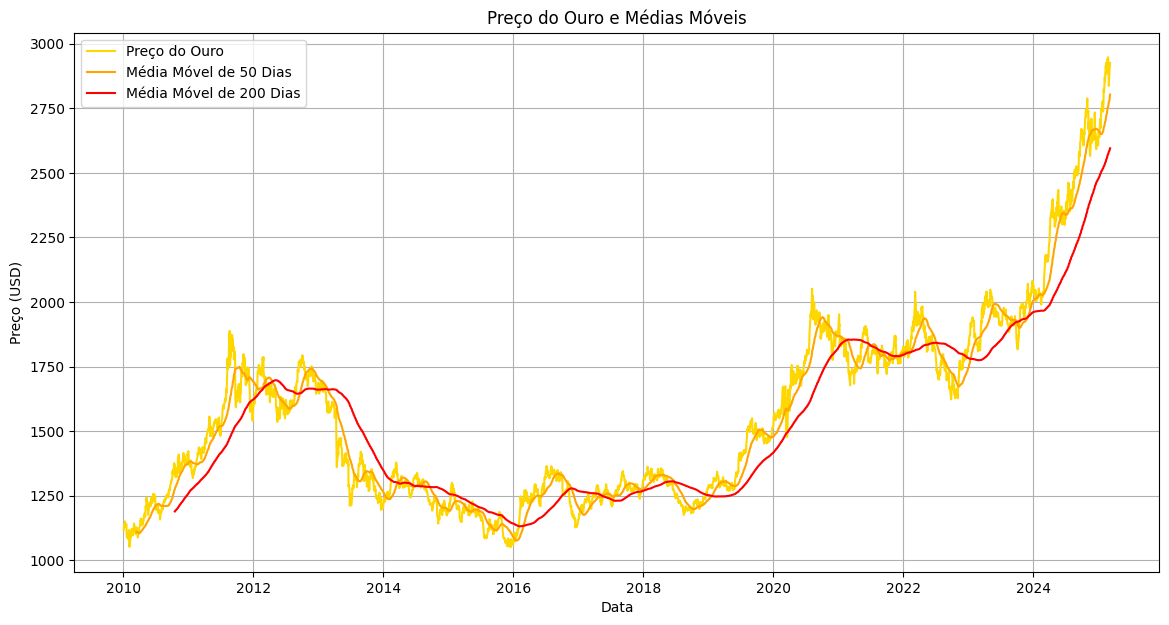

In [24]:
gold_data['50 Day MA'] = gold_data['Close'].rolling(window=50).mean()
gold_data['200 Day MA'] = gold_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Preço do Ouro', color='gold')
plt.plot(gold_data['50 Day MA'], label='Média Móvel de 50 Dias', color='orange')
plt.plot(gold_data['200 Day MA'], label='Média Móvel de 200 Dias', color='red')
plt.title('Preço do Ouro e Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 4.3. Correlação entre Commodities
Baixe dados de outras commodities e calcule a correlação entre seus retornos:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


              Ouro     Prata  Petróleo
Ouro      1.000000  0.801034  0.128458
Prata     0.801034  1.000000  0.213627
Petróleo  0.128458  0.213627  1.000000


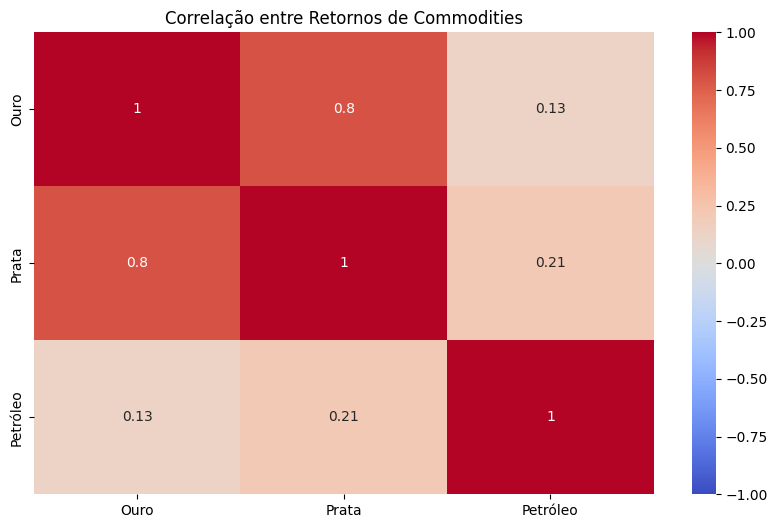

In [12]:
# Baixar dados de prata e petróleo
silver_data = yf.download('SI=F', start='2010-01-01', end='2023-10-01')
oil_data = yf.download('BZ=F', start='2010-01-01', end='2023-10-01')

# Calcular retornos diários
silver_data['Daily Return'] = silver_data['Close'].pct_change()
oil_data['Daily Return'] = oil_data['Close'].pct_change()

# Criar DataFrame de retornos
returns = pd.DataFrame({
    'Ouro': gold_data['Daily Return'],
    'Prata': silver_data['Daily Return'],
    'Petróleo': oil_data['Daily Return']
}).dropna()

# Matriz de correlação
correlation_matrix = returns.corr()
print(correlation_matrix)

# Heatmap da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Retornos de Commodities')
plt.show()

5. Modelagem e Previsão
5.1. Decomposição de Séries Temporais
Use a decomposição para separar tendência, sazonalidade e resíduos:

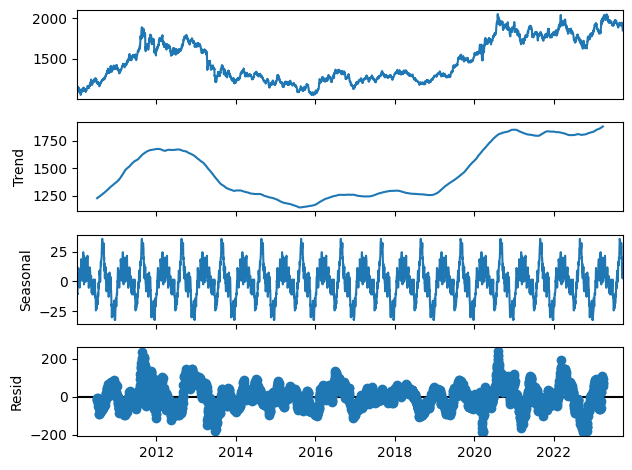

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(gold_data['Close'].dropna(), period=252)
decomposition.plot()
plt.show()

# 5.2. Modelo ARIMA
Ajuste um modelo ARIMA para prever preços futuros:

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   GC=F   No. Observations:                 3456
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14369.136
Date:                Fri, 07 Mar 2025   AIC                          28750.273
Time:                        13:22:15   BIC                          28787.158
Sample:                             0   HQIC                         28763.445
                               - 3456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0287      0.012     -2.347      0.019      -0.053      -0.005
ar.L2         -0.0094      0.012     -0.788      0.431      -0.033       0.014
ar.L3          0.0060      0.014      0.443      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


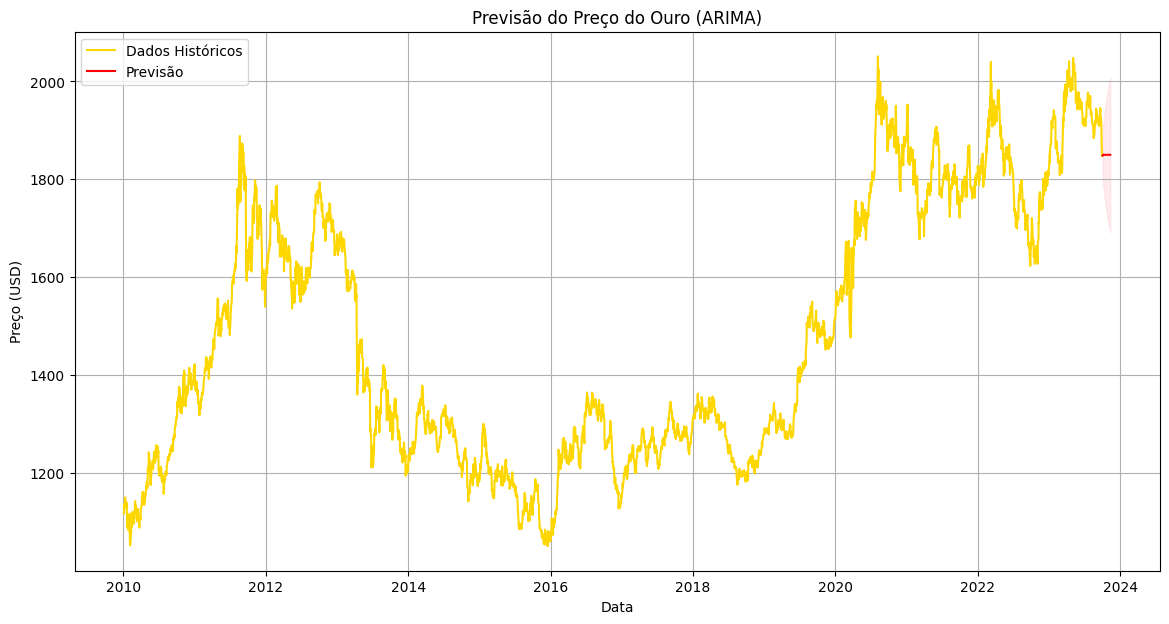

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA
model = ARIMA(gold_data['Close'].dropna(), order=(5, 1, 0))
results = model.fit()
print(results.summary())

# Previsão para os próximos 30 dias
forecast = results.get_forecast(steps=30)
forecast_index = pd.date_range(gold_data.index[-1], periods=31, freq='B')[1:]
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotar previsão
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Dados Históricos', color='gold')
plt.plot(forecast_index, forecast_values, label='Previsão', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Previsão do Preço do Ouro (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Estratégias de Trading
6.1. Crossover de Médias Móveis
Uma estratégia simples é comprar quando a média de curto prazo cruza acima da média de longo prazo e vender quando ocorre o contrário:

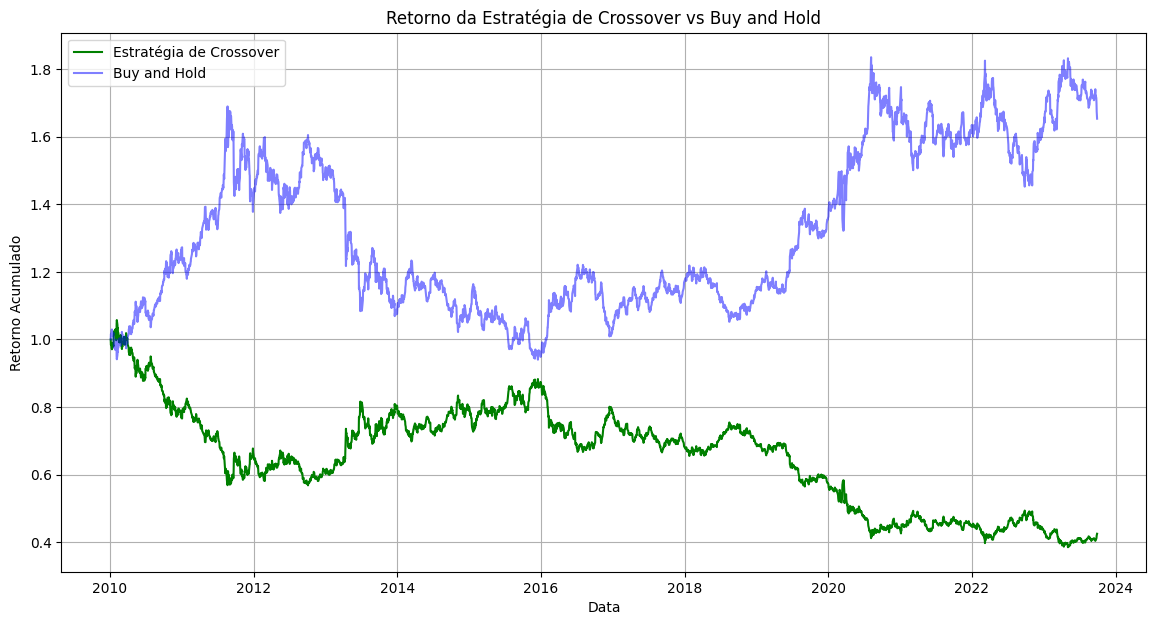

In [ ]:
gold_data['Signal'] = np.where(gold_data['50 Day MA'] > gold_data['200 Day MA'], 1, -1)
gold_data['Strategy Return'] = gold_data['Signal'].shift(1) * gold_data['Daily Return']

# Plotar retornos da estratégia
plt.figure(figsize=(14, 7))
plt.plot((1 + gold_data['Strategy Return']).cumprod(), label='Estratégia de Crossover', color='green')
plt.plot((1 + gold_data['Daily Return']).cumprod(), label='Buy and Hold', color='blue', alpha=0.5)
plt.title('Retorno da Estratégia de Crossover vs Buy and Hold')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()

# 7. Conclusão
Essa análise quantitativa de commodities cobre desde a coleta de dados até a modelagem e estratégias de trading. Dependendo do seu objetivo, você pode expandir a análise para incluir mais commodities, modelos mais complexos ou técnicas de machine learning.